<a href="https://colab.research.google.com/github/Saicharan-007/haihua_INFO5731_Fall2022/blob/main/In_class_exercise_05_11172022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier


In [ ]:
train_d_frme = pd.read_csv(r'stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train_d_frme[['Sentiment','Text']] = train_d_frme["Text"].str.split(" ", 1, expand=True)

train_d_frme.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
test_d_frme = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test_d_frme[['Sentiment','Text']] = test_d_frme["Text"].str.split(" ", 1, expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
test_d_frme.head()


,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def cleantext(txt):
  txt="".join([w.lower() for w in txt if w not in string.punctuation])
  txt = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", txt)
  tok = re.split('\W+',txt)
  txt = [w_l.lemmatize(w1) for w1 in tok if w1 not in stopword]
  return txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('omw-1.4')
tf_vect = TfidfVectorizer(analyzer = clean_text)
X_i_df = tf_vect.fit_transform(train_dfrme['Text'])
print(X_i_df.shape)
X_i_df_dafrme=pd.DataFrame(X_idf.toarray())
X_i_df_dafrme.columns=tf_vect.get_feature_names()
X_test_idf = tf_vect.transform(test_dfrme['Text'])
print(X_idf.shape)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


(6920, 13343)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(6920, 13343)


In [ ]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
xtrain, xtest, ytrain, ytest = traintestsplit(X_idf_dafrme, train_dfrme['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
MNB_test = MNB.fit(x_train,ytrain)
Y_MNB = MNB_test.predict(xtest)
print('Accuracy %s' % accuracy_score(Y_MNB,ytest))
print(classification_report(ytest,Y_MNB))
from sklearn.model_selection import cross_val_score
sco_MNB = cross_val_score(MNB, xtest, ytest, cv=10)
print("Accuracy using MNB",sco_MNB.mean())


Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy using MNB 0.7247054530288813


In [ ]:
SVtest = SVM.fit(xtrain,ytrain)
YSVM = SVM_test.predict(xtest)
print('Accuracy %s' % accuracy_score(YSVM,ytest))
print(classification_report(ytest,YSVM))
from sklearn.model_selection import cross_val_score
sco_SVM = cross_val_score(SVM, xtest, ytest, cv=10)
print("Accuracy using SVM",sco_SVM.mean())

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy using SVM 0.7348034615785632


In [ ]:
KNNtest = KNN.fit(xtrain,ytrain)
YKNN = KNNtest.predict(xtest)
print('Accuracy %s' % accuracy_score(YKNN,ytest))
print(classification_report(ytest,YKNN))
from sklearn.model_selection import cross_val_score
scores_KNN = cross_val_score(KNN, xtest, ytest, cv=10)
print("Accuracy using knn",scores_KNN.mean())


Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy using knn 0.6675737670732979


In [ ]:
dec_tree_test = DT.fit(x_train,y_train)
Y_dec_tree = dec_tree_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_dec_tree,y_test))
print(classification_report(y_test,Y_dec_tree))
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Accuracy of Decision trees",scores_DT.mean())


Accuracy 0.6560693641618497
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       671
           1       0.66      0.68      0.67       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy of Decision trees 0.6162965279949952


In [ ]:
RF_test = RF.fit(x_train,y_train)
Y_RF = RF_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_RF,ytest))
print(classification_report(ytest,Y_RF))
sco_RF = cross_val_score(RF, xtest, ytest, cv=10)
print("Accuracy using Random Forest",sco_RF.mean())


Accuracy 0.7434971098265896
              precision    recall  f1-score   support

           0       0.80      0.63      0.70       671
           1       0.71      0.85      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384

Accuracy using Random Forest 0.6718955270566156


In [ ]:
XGB_test = XGB.fit(x_train,y_train)
Y_XGB = XGB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_XGB,y_test))
print(classification_report(y_test,Y_XGB))
sco_XGB = cross_val_score(XGB, x_test, y_test, cv=10)
print("Accuracy using XGBoost",sco_XGB.mean())

Accuracy 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384

Accuracy using XGBoost 0.6184704410384736


In [ ]:
print("Accuracy using MNB",sco_MNB.mean())
print("Accuracy using SVM",sco_SVM.mean())
print("Accuracy using knn",scores_KNN.mean())
print("Accuracy using Decision trees",scores_DT.mean())
print("Accuracy using Random Forest",sco_RF.mean())
print("Accuracy using XGBoost",sco_XGB.mean())

Accuracy using MNB 0.7247054530288813
Accuracy using SVM 0.7348034615785632
Accuracy using knn 0.6675737670732979
Accuracy using Decision trees 0.6162965279949952
Accuracy using Random Forest 0.6718955270566156
Accuracy using XGBoost 0.6184704410384736


In [ ]:
predict_MNB = MNB_test.predict(X_test_idf)
print('Final trained model(MNB) with high accuracy evaluated based on the test data: %s' % accuracy_score(predict_MNB,test_dfrme['Sentiment']))

Final trained model(MNB) with high accuracy evaluated based on the test data: 0.7946183415705657


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
#Write your code here.
import pandas as pd
sample_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')




In [ ]:
sample_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


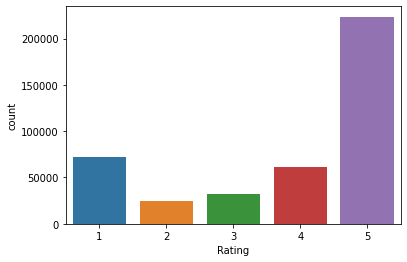

In [ ]:
import seaborn as sns
sns.countplot(sample_data.Rating)

In [ ]:
def data(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = sample_data['Rating']
posNeg = act_Sco.map(part) 
sample_data['RatingPosNeg'] = posNeg

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


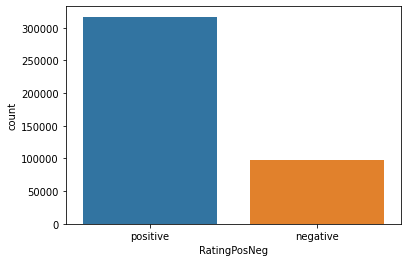

In [ ]:
sns.countplot(sample_data.RatingPosNeg)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') 
st=set(stopwords.words('english'))

sample = sample_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def cleandata(se):
    clean_dt = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_dt = re.sub(r'[.|,|)|(|\|/]',r' ',clean_dt)
    return  clean_dt

In [ ]:
result = sample_data.sample(n=10000, random_state=1)

In [ ]:
import re

i=0
st1=' '
fi_str=[]
all_pos_wrds=[] 
all_neg_wrds=[] 
s1=''
for ke in final['Reviews'].values:
    fil_se=[]
    try:
      for w in ke.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):    
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive': 
                          all_pos_wrds.append(s) 
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_neg_wrds.append(s) 
                  else:
                      continue
              else:
                  continue 
      str1 = b" ".join(fil_se)
      
      fi_str.append(str1)
      i+=1
    except AttributeError as e:
      fi_str.append('')
      i+=1

In [ ]:
final['CleanedText']=fi_str 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ct_vect = CountVectorizer()
bo = ct_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)


(10000, 8444)


In [ ]:
finalterm = ct_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='auto')
mod.fit(bo)

KMeans(n_clusters=10, random_state=99)

In [ ]:
nwlab = mod.labels_
cluster_center=mod.cluster_centers_


In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score


0.27313704420543833

In [ ]:
datafrme = final
datafrme['Bow Clus Label'] = mod.labels_ 
datafrme.head(2)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0


In [ ]:
datafrme.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0    7396
1       1
2       3
3      83
4     124
5    1922
6      16
7       1
8       2
9     452
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % term[i], end='')
        print()


Top terms per cluster:
Cluster 0: phone
 work
 good
 great
 love
 use
 product
 excel
 like
 one
Cluster 1: appl
 iphon
 android
 phone
 samsung
 year
 even
 version
 compani
 know
Cluster 2: phone
 sim
 card
 use
 verizon
 updat
 work
 like
 new
 store
Cluster 3: phone
 use
 get
 like
 one
 screen
 work
 app
 batteri
 good
Cluster 4: phone
 use
 screen
 get
 batteri
 like
 app
 camera
 good
 devic
Cluster 5: phone
 work
 use
 great
 one
 good
 like
 get
 screen
 would
Cluster 6: phone
 use
 screen
 like
 app
 work
 get
 one
 good
 android
Cluster 7: phone
 one
 use
 issu
 band
 like
 far
 app
 good
 usa
Cluster 8: use
 app
 favorit
 screen
 phone
 display
 one
 great
 recent
 back
Cluster 9: phone
 use
 work
 one
 get
 like
 would
 screen
 good
 great


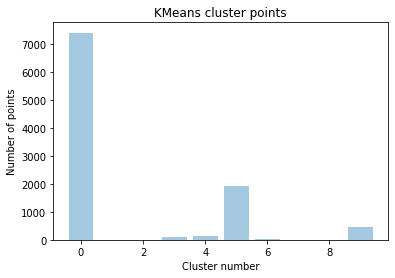

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], dfrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
idatafrm_vect = TfidfVectorizer()
idatafrm = idatafrm_vect.fit_transform(final['CleanedText'].values)
idatafrm.shape

(10000, 8444)

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

KMeans(n_clusters=10, random_state=99)

In [ ]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.21641605e-04, 1.41311774e-05, 6.79047527e-05, ...,
        1.51866739e-04, 1.51866739e-04, 1.58800134e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
ter = idf_vect.get_feature_names()
ter[1:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aac',
 'aand',
 'ab',
 'abandon',
 'abc',
 'abd',
 'abeautifulit',
 'abierto',
 'abil']

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.06267416295069758

In [ ]:
dfrme1 = dfrme
dfrme1['Tfidf Clus Label'] = mod.labels_
dfrme1.head(5)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,5
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,8
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,5,5
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,0,1
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,0,2


In [ ]:
dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     443
1     396
2    3782
3     312
4     375
5    3720
6     343
7     172
8     262
9     195
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in order_centroids[i1, :10]:
        print(' %s' % ter[i], end='')
        print()


Top terms per cluster:
Cluster 0: great
 phone
 work
 price
 product
 buy
 condit
 good
 thank
 fast
Cluster 1: good
 phone
 product
 price
 work
 condit
 thank
 qualiti
 nice
 realli
Cluster 2: work
 product
 good
 thank
 nice
 expect
 use
 great
 happi
 well
Cluster 3: love
 phone
 great
 new
 good
 son
 daughter
 iphon
 thank
 gift
Cluster 4: excel
 product
 phone
 recommend
 thank
 love
 good
 seller
 price
 purchas
Cluster 5: phone
 use
 work
 great
 one
 good
 batteri
 get
 screen
 love
Cluster 6: like
 phone
 new
 look
 work
 realli
 great
 much
 brand
 good
Cluster 7: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 8: perfect
 work
 condit
 phone
 product
 everyth
 love
 great
 excel
 thank
Cluster 9: far
 good
 phone
 work
 great
 love
 problem
 use
 like
 fine


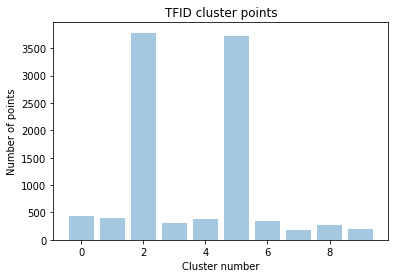

In [ ]:
plt.bar([x1 for x1 in range(10)], dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [ ]:
i1=0
lst_sent_tr=[]
for s in final['CleanedText'].values:
    filter_sen=[]
    for w in se.split():
        for cle in clpunc(w).split():
            if(cle.isalpha()):    
                filter_sen.append(cle.lower())
            else:
                continue 
    lst_sent_tr.append(filter_sen)
print(lst_sent_tr)

[['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'pa

In [ ]:
import gensim
w2v_mod=gensim.models.Word2Vec(lst_sent_tr,size=100, workers=4)

In [ ]:
import numpy as np
se_vecs = []; 
for se in lst_sent_tr: 
    se_vec = np.zeros(100) 
    cnt_words =0;
    for word in se: 
        try:
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except:
            pass
    se_vec /= cnt_words
    se_vecs.append(se_vec)
se_vecs = np.array(se_vecs)
se_vecs = np.nan_to_num(se_vecs)
se_vecs.shape


(10000, 100)

In [ ]:
n_clu = [x1 for x1 in range(3,11)]
n_clu

[3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
squared_errors = []
for cluster in n_clu:
    kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
    squared_errors.append(kmeans.inertia_)     
optimal_clusters = np.argmin(squared_errors) + 2  
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points 

The optimal number of clusters obtained is -  2
The loss for optimal cluster is -  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(se_vecs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


KMeans(n_clusters=2)

In [ ]:
word_cluster_pred=model2.predict(se_vecs)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-1.28778478e-01,  4.83984568e-02, -1.71829643e-01,
        -9.51236727e-02, -7.34837891e-03,  8.41409191e-02,
        -2.23865553e-02, -4.34659657e-02,  2.13543863e-01,
         2.65804071e-02,  1.03220854e-01,  1.50394117e-01,
         7.46665187e-02, -2.44527737e-01,  1.19000738e-01,
         1.21561420e-01,  6.83834903e-02,  8.18305405e-02,
        -2.65783273e-02,  3.58067170e-02,  2.61921937e-02,
         2.23661941e-01,  7.82208782e-02,  5.41990503e-02,
        -3.65380291e-02,  2.14391342e-01, -1.89915560e-01,
        -5.22423602e-02, -7.48859269e-02,  4.19626096e-02,
        -9.73184767e-02, -4.51853115e-02,  7.28507700e-02,
        -3.31394826e-02,  7.64816213e-03,  2.57349844e-01,
        -8.04240371e-02,  1.29374175e-02,  7.37804070e-02,
        -5.91706101e-02, -8.24572833e-02, -7.44489318e-02,
        -1.61264970e-01, -2.23742732e-02,  1.30076545e-01,
         6.59685017e-02,  8.97311961e-02,  7.94967559e-02,
        -2.98918229e-01, -1.34637562e-01, -1.83055401e-0

In [ ]:
datafrm = dfrme1
datafrm['AVG-W2V Clus Label'] = model2.labels_
datafrm.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,5,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,8,0


In [ ]:
from sklearn.cluster import DBSCAN
mi_Pts = 2 * 100
def low(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mi_tr = int(l + (r - l) / 2)
        if nums[mi_tr] >= target:
            r = mi_tr - 1
        else:
            l = mi_tr + 1
    return l
def compute200t(x, data):
    dists1 = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists1) == 200 and dists1[199] > dist): 
            l = int(low_bound(dists1, dist)) 
            if l < 200 and l >= 0 and dists1[l] > dist:
                dists1[l] = dist
        else:
            dists1.append(dist)
            dists1.sort()
    
    return dists1[199]

In [ ]:
two_hund_neigh = []
for v1 in se_vecs[:1500]:
    two_hund_neigh.append( compute200thnearestneighbour(v1, se_vecs[:1500]) )
two_hund_neigh.sort()

In [ ]:
mod_DB = DBSCAN(eps = 5, min_samples = mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)


DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [ ]:
dfrme_db = dafrme
dfrme_db['AVG-W2V Clus Label'] = mod_DB.labels_
dfrme_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,5,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,8,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


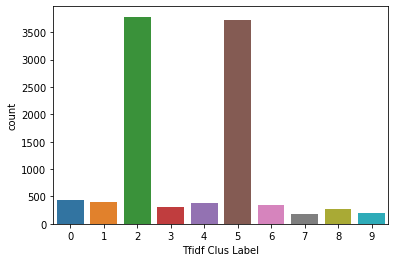

In [ ]:
import seaborn as sns
sns.countplot(dfrme_db['Tfidf Clus Label'])

In [ ]:
daframe.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    10000
Name: Reviews, dtype: int64

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(se_vecs)

In [ ]:
dafrme_a = dfrme_db
dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,5,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,8,0


In [ ]:
dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()


AVG-W2V Clus Label
0    9996
1       1
2       1
3       1
4       1
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

Kmeans: After the data is first grouped by similarity, the data points of k numbers are randomly assigned, exposing the centroids of each group. The remaining data points are then mapped to the following closest centroid, and this procedure is repeated within each of these groups until the information in the centroids changes and every data point is stored in the same group.

DBSCAN: To aid distinguish among data that are identical in nature, data points are classified according on how similar they are, and areas with greater data densities are kept as a single group while areas with lower densities are saved as noise. A density-based spatial clustering technique called DBSCAN (Density-based spatial clustering of applications with noise)